## Title: Job Posting analysis and Data Cleaning using Python

### Introduction: 

In today's job market, data plays a crucial role in making informed decisions for both job seekers and employers. In this project, we used Python to analyze job postings with the goal of finding meaningful information that will be useful to recruiters, employers, and job seekers alike. 

### Background

Job posting analysis involves examining datasets scraped by Data Engineering Interns to uncover valuable insights and trends in the job market. 



### Project Objectives:

❑ Utilize Python libraries and tools to perform EDA on the collected job data.

❑ Identify trends, patterns, and insights related to the different technology jobs.

❑ Visualize the analysis results using appropriate charts, graphs, and visual representations.

### Data Collection & Processing

Data engineering interns gathered the datasets from different sources while we conducted data cleaning for analysis.

- Removing duplicates

- Handling missing values

- Standardizing formats

- Correcting errors


In [1]:
### import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

In [2]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Project 3\transformed_jobs_data.csv")

In [5]:
df.head()

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,Montréal,CA,12/19/2023 20:22,NaN,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,NaN,CA,12/19/2023 15:55,NaN,NaN
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,Toronto,CA,12/19/2023 22:30,http://www.rbc.com,Finance
3,5y7azm6gLeu1ab_9AAAAAA==,FULLTIME,Lead Data Engineer,https://ca.linkedin.com/jobs/view/lead-data-en...,"Overview\n\nAt Nortal, we are driven by a gran...",NaN,CA,12/19/2023 17:06,http://www.nortal.com,Computer Services
4,CJUJsgmqVdDmJmHgAAAAAA==,FULLTIME,2024 Investor Services - Business Data Analyst...,https://jobs.rbc.com/ca/en/job/R-0000074144/20...,Job Summary\n\nWhat is the opportunity?\n\nAs ...,Toronto,CA,12/20/2023 0:00,http://www.rbc.com,Finance


In [6]:
df.tail()

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
161,0JxLam0cJtXsmjQZAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Las Vegas,US,12/19/2023 12:11,http://www.bdo.com,Consulting
162,EGvoxwF7K6W0LOMtAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Richmond,US,12/19/2023 10:42,http://www.bdo.com,Consulting
163,TvhAbNPDfD24fyHVAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Fort Worth,US,12/19/2023 11:52,http://www.bdo.com,Consulting
164,6N_3eAHv_8HXYM0cAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Columbus,US,12/19/2023 12:15,http://www.bdo.com,Consulting
165,iQu2KNPFHbJstSZuAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Fort Lauderdale,US,12/19/2023 12:11,http://www.bdo.com,Consulting


In [7]:
df.shape

(166, 10)

In [8]:
 df.columns

Index(['job_id', 'job_employment_type', 'job_title', 'job_apply_link',
       'job_description', 'job_city', 'job_country', 'job_posted_at_timestamp',
       'employer_website', 'employer_company_type'],
      dtype='object')

In [9]:
# Data verification - Data type, number of features and rows, missing data, e.t.c
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   job_id                   166 non-null    object
 1   job_employment_type      166 non-null    object
 2   job_title                166 non-null    object
 3   job_apply_link           166 non-null    object
 4   job_description          166 non-null    object
 5   job_city                 128 non-null    object
 6   job_country              166 non-null    object
 7   job_posted_at_timestamp  166 non-null    object
 8   employer_website         113 non-null    object
 9   employer_company_type    76 non-null     object
dtypes: object(10)
memory usage: 13.1+ KB


In [10]:
{x: len(df[x].unique())for x in df.columns}

{'job_id': 166,
 'job_employment_type': 4,
 'job_title': 99,
 'job_apply_link': 166,
 'job_description': 153,
 'job_city': 71,
 'job_country': 3,
 'job_posted_at_timestamp': 139,
 'employer_website': 89,
 'employer_company_type': 14}

In [11]:
df.describe()

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
count,166,166,166,166,166,128,166,166,113,76
unique,166,4,99,166,153,70,3,139,88,13
top,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,Job Description\n\nJob Summary:\n\nThis positi...,London,US,12/20/2023 0:00,http://www.bdo.com,Finance
freq,1,153,31,1,14,29,73,7,14,18


In [12]:
# Convert 'job_posted_at_timestamp' to datetime
df['job_posted_at_timestamp'] = pd.to_datetime(df['job_posted_at_timestamp'])

In [13]:
# Analyze the distribution of job postings over time
job_postings_over_time = df['job_posted_at_timestamp'].dt.date.value_counts().sort_index()
print("\nJob Postings Over Time:")
print(job_postings_over_time)


Job Postings Over Time:
2023-12-19    144
2023-12-20     22
Name: job_posted_at_timestamp, dtype: int64


In [14]:
# Check for duplicates
df.duplicated().sum()

0

### Data Cleaning

job_id                      0
job_employment_type         0
job_title                   0
job_apply_link              0
job_description             0
job_city                   38
job_country                 0
job_posted_at_timestamp     0
employer_website           53
employer_company_type      90
dtype: int64


<Axes: >

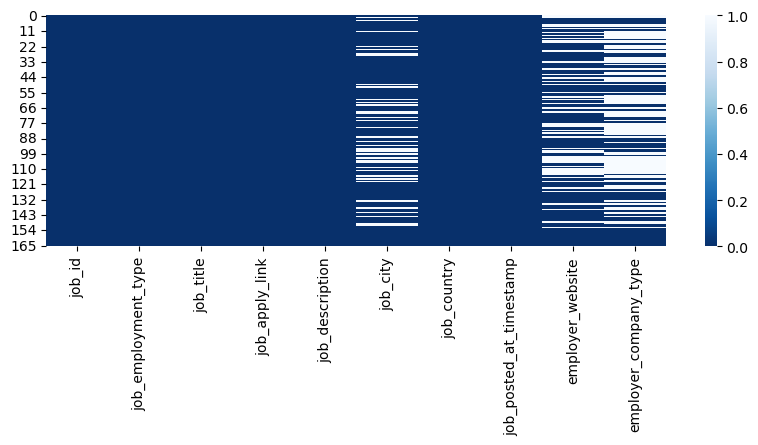

In [15]:
# Check for missing values
print(df.isnull().sum())

# Visualization the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [16]:
# job_city is a categorical data
df['job_city'].mode()[0]

'London'

In [17]:
# Replace the missing values with mode
df['job_city']=df['job_city'].fillna(df['job_city'].mode()[0])

In [18]:
df['job_city'].isnull().sum()

0

In [19]:
# employer_company_type is a categorical data
df['employer_company_type'].mode()[0]

'Consulting'

In [20]:
# Replace the missing values with mode
df['employer_company_type']=df['employer_company_type'].fillna(df['employer_company_type'].mode()[0])

In [21]:
df['employer_company_type'].isnull().sum()

0

In [22]:
# employer_website is a categorical data
df['employer_website'].mode()[0]

'http://www.bdo.com'

In [23]:
# Replace the missing values with mode
df['employer_website']=df['employer_website'].fillna(df['employer_website'].mode()[0])

In [24]:
df['employer_website'].isnull().sum()

0

In [25]:
# Cleaning job_posted_at_timestamp column by converting it to datetime
df['job_posted_at_timestamp'] = pd.to_datetime(df['job_posted_at_timestamp'])

job_id                     0
job_employment_type        0
job_title                  0
job_apply_link             0
job_description            0
job_city                   0
job_country                0
job_posted_at_timestamp    0
employer_website           0
employer_company_type      0
dtype: int64


<Axes: >

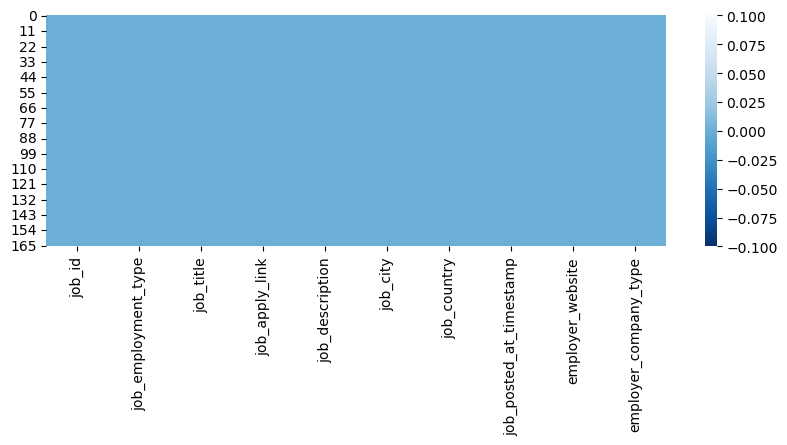

In [26]:
# Check for missing values
print(df.isnull().sum())

# Visualization the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [27]:
# Assign sequential numbers to job entries
df['job_id'] = range(1, len(df) + 1)

# Display modified dataset
# print(df)

In [28]:
# df.head()

In [29]:
# Replace "Montréal" with "Montreal" in the 'job_city' column
df['job_city'] = df['job_city'].replace('MontrÃ©al', 'Montreal')

In [30]:
# df.head()

In [31]:
df.to_csv(r"C:\Users\ADMIN\Desktop\Project 3 Cleaned transformed_jobs_data.csv", index=False)

## EXPLORATORY DATA ANALYSIS (EDA)

### Univariate Analysis

In [32]:
# Explore job types distribution
job_types_distribution = df['job_employment_type'].value_counts()
print("\nJob Types Distribution:")
print(job_types_distribution)


Job Types Distribution:
FULLTIME      153
CONTRACTOR     10
INTERN          2
PARTTIME        1
Name: job_employment_type, dtype: int64


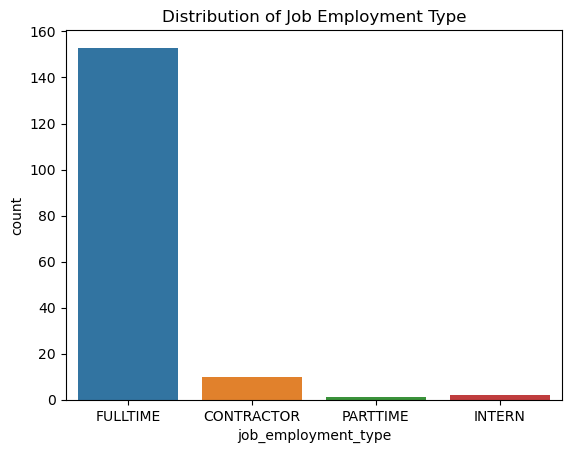

In [33]:
# Distribution of job types after cleaning
sns.countplot(x='job_employment_type', data=df)
plt.title('Distribution of Job Employment Type')
plt.show();

### From this distribution, it's evident that the majority of job postings are for full-time positions, comprising approximately 90% of the dataset. 

In [34]:
# Explore job types distribution
job_types_distribution = df['job_country'].value_counts()
print("\nJob Types by Country:")
print(job_types_distribution)


Job Types by Country:
US    73
GB    60
CA    33
Name: job_country, dtype: int64


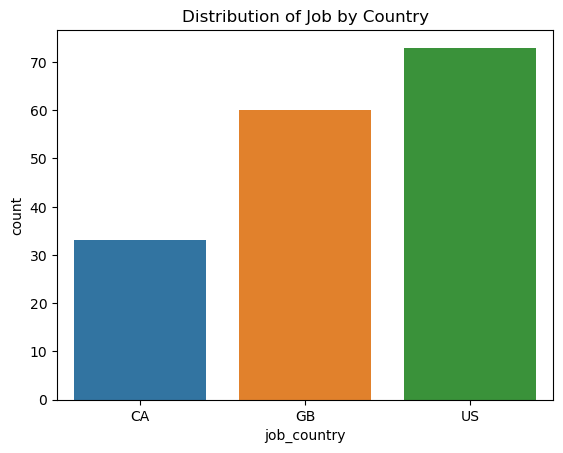

In [35]:
# Distribution of job types after cleaning
sns.countplot(x='job_country', data=df)
plt.title('Distribution of Job by Country')
plt.show();

### The United States (US) leads with the highest number of job postings, followed by Great Britain (GB) and Canada (CA). 

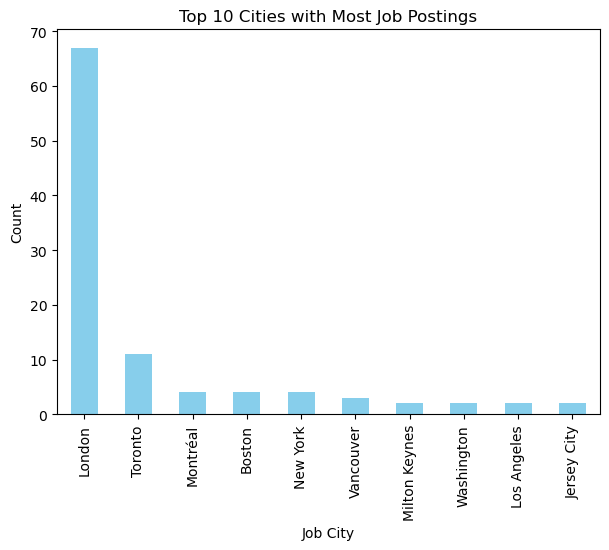

In [36]:
top_job_cities = df['job_city'].value_counts().head(10)
top_job_cities.plot(kind='bar', figsize=(7, 5), color='skyblue')
plt.title('Top 10 Cities with Most Job Postings')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.show()

### London emerges as the top city for job postings, indicating a robust job market in the UK capital. Toronto follows with a significant number of job opportunities, while Jersey City has the least.

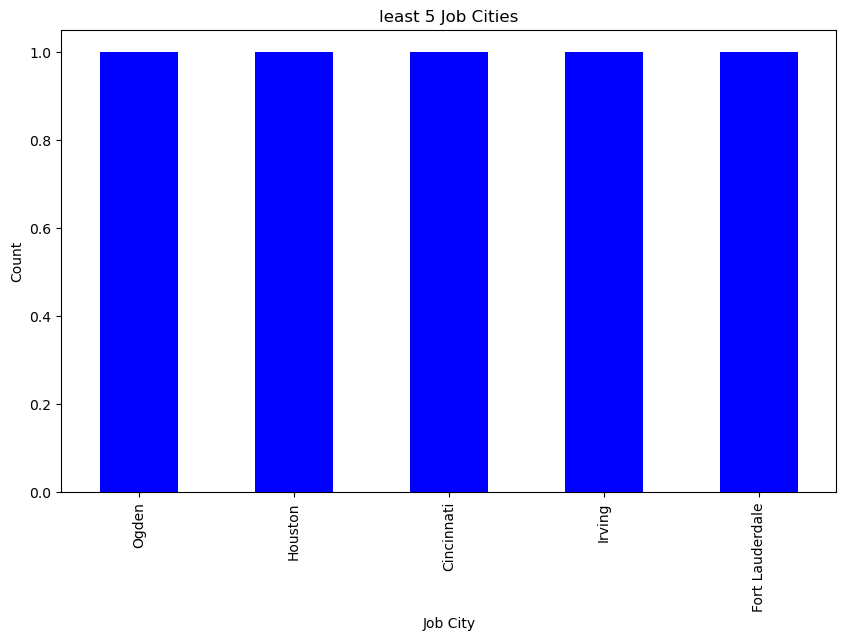

In [37]:
top_job_cities = df['job_city'].value_counts().tail(5)
top_job_cities.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('least 5 Job Cities')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.show()

In [38]:
# Count the occurrences of each company type
top_job_cities = df['job_title'].value_counts().head(10)
top_job_cities

Data Engineer                                              31
Senior Cloud Data Engineer                                 14
Senior Data Engineer                                       12
Data Analyst                                                6
Data Scientist                                              3
Lead Data Engineer                                          3
Senior Data Analyst                                         2
AWS Data Engineer                                           2
Splunk Data Engineer, Security                              2
Digital Data Analyst (Entry Level) (Fair Marketing Inc)     2
Name: job_title, dtype: int64

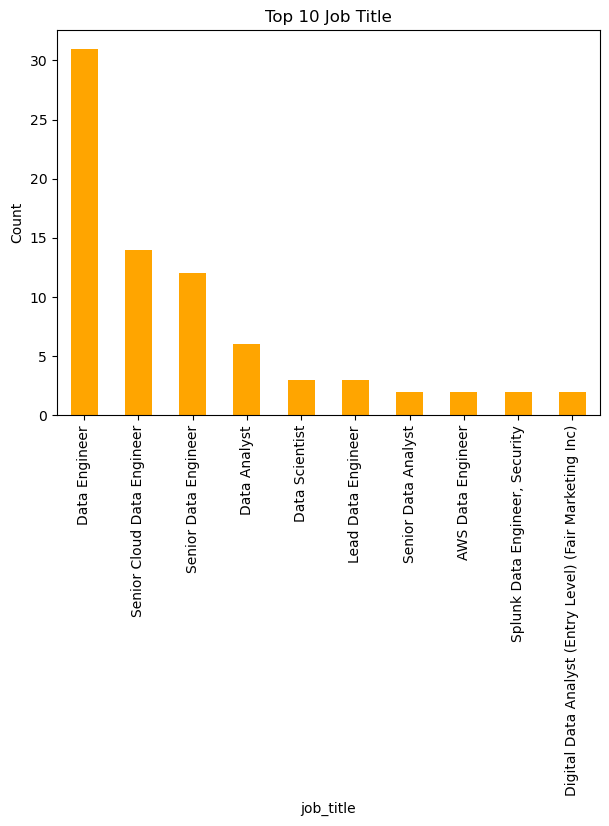

In [39]:
top_job_cities = df['job_title'].value_counts().head(10)
top_job_cities.plot(kind='bar', figsize=(7, 5), color='orange')
plt.title('Top 10 Job Title')
plt.xlabel('job_title')
plt.ylabel('Count')
plt.show()

### Data Engineer is the most common job title among the postings, with 31 occurrences. This indicates a high demand for professionals skilled in designing, building, and managing data pipelines.

### Bivariate Analysis

### Industry Insights

In [40]:
# Count the occurrences of each company type
company_type_counts = df['employer_company_type'].value_counts()
company_type_counts

Consulting           108
Finance               18
Manufacturing         10
Computer Services      9
Information            7
Education              3
Retail                 3
Staffing               2
Construction           2
Utilities              1
Advertising            1
Restaurant             1
Logistics              1
Name: employer_company_type, dtype: int64

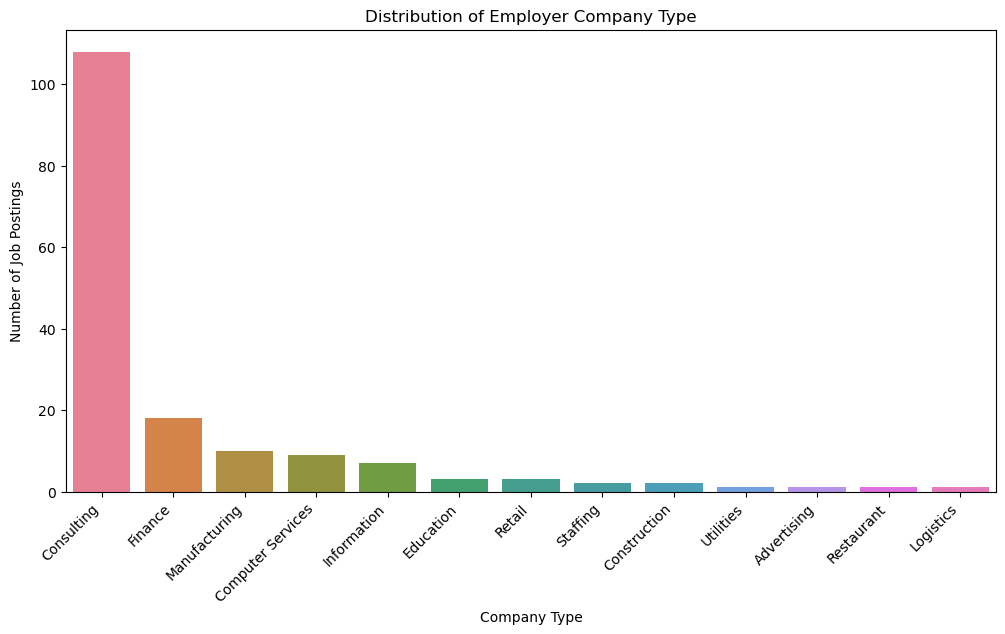

In [41]:
# Plot the distribution of job postings by company type
plt.figure(figsize=(12, 6))
sns.barplot(x=company_type_counts.index, y=company_type_counts.values, palette='husl')
plt.title('Distribution of Employer Company Type')
plt.xlabel('Company Type')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### The consulting industry dominates the job market represented in the dataset, with a significant number of job postings.

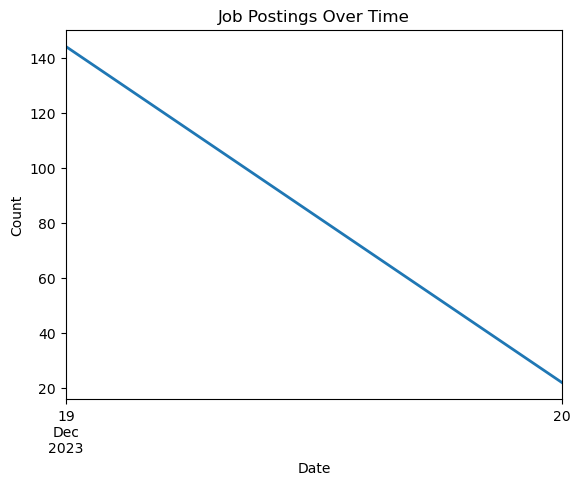

In [42]:
# Assuming 'job_posted_at_timestamp' is a timestamp column
df['job_posted_at_timestamp'] = pd.to_datetime(df['job_posted_at_timestamp'])
df.set_index('job_posted_at_timestamp').resample('D').size().plot(linewidth=2)
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### To observe any trends or patterns in job postings over the analyzed time period, after 19th December to 20th December was on decline

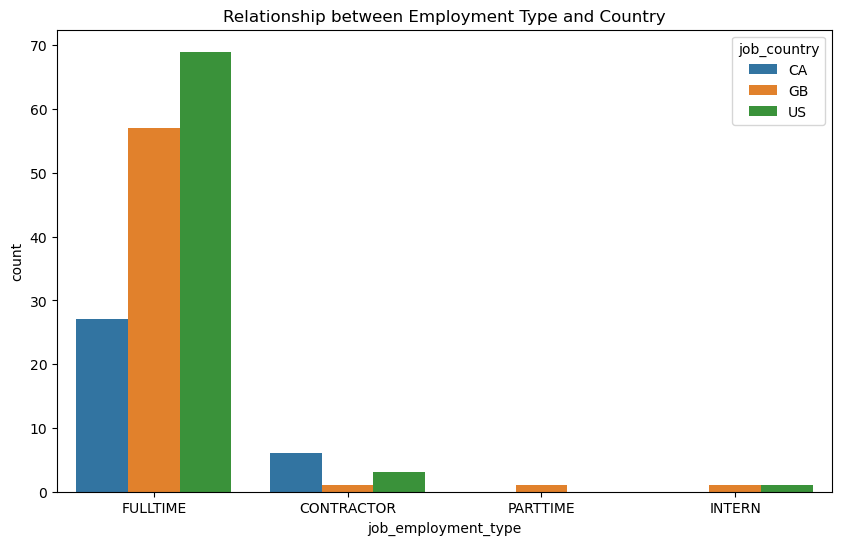

In [43]:
# Example: Relationship between employment type and country
plt.figure(figsize=(10, 6))
sns.countplot(x='job_employment_type', hue='job_country', data=df)
plt.title('Relationship between Employment Type and Country')
plt.show()

### Stacked Bar Chart

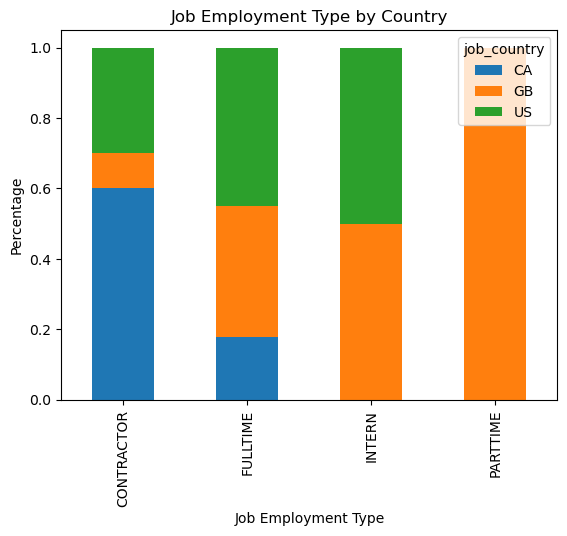

In [44]:
pd.crosstab(df['job_employment_type'], df['job_country'],
normalize='index').plot(kind='bar', stacked=True)
plt.title('Job Employment Type by Country')
plt.xlabel('Job Employment Type')
plt.ylabel('Percentage')
plt.show();

### In contractor job employment type, Canada has the most job posting amounted to 60% followed US and GB

In [45]:
!pip install wordcloud

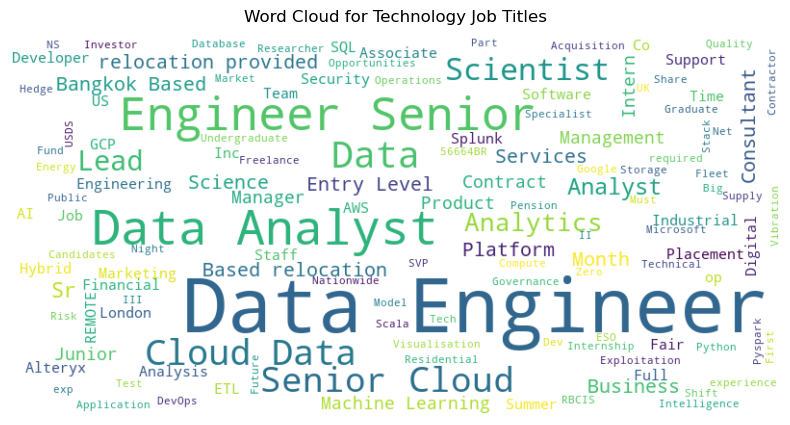

In [46]:
from wordcloud import WordCloud

# Example:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Technology Job Titles')
plt.show()

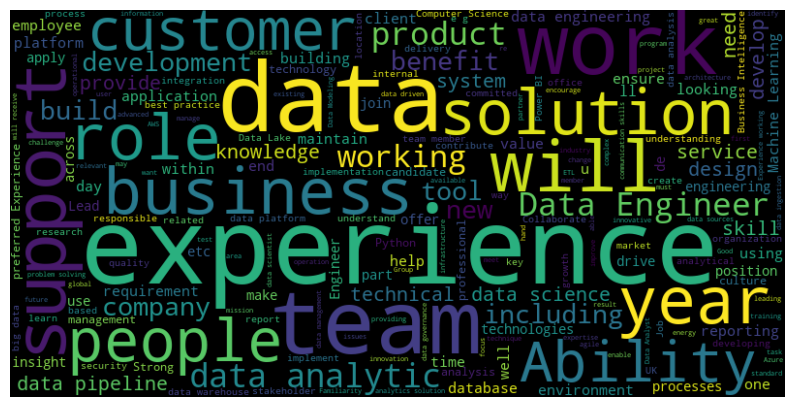

(None,)

In [47]:
# 
text = ' '.join(df['job_description'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show(),

## Key Insights

### Job Type Distribution:

- The majority of job postings are for full-time positions (153), followed by contractor positions (10), internships (2), and part-time roles (1).

### Distribution by Country:

- The United States (US) has the highest number of job postings with 73, followed by Great Britain (GB) with 60 postings and Canada (CA) with 33 postings.

### Top Cities for Job Postings:

- London has the highest number of job postings with 67, indicating a significant concentration of job opportunities in the city.
- Toronto follows with 11 job postings, while Montreal, Boston, and New York each have 4 postings.
- Other cities like Ogden, Houston, Cincinnati, Irving, and Fort Lauderdale have one posting each, indicating a diverse geographical distribution of job opportunities.

### Industry Insights:

- The consulting industry has the highest number of job postings with 108, suggesting a strong demand for professionals in this sector.
- Finance and manufacturing follow with 18 and 10 job postings, respectively.
- Other industries with notable job postings include computer services, information, education, retail, staffing, construction, utilities, advertising, restaurant, and logistics.

### Job Seekers:

- Job seekers can use the insights from this project to identify trends in the job market, such as the most in-demand job types, popular industries, and preferred locations for job opportunities.
- By understanding the distribution of job types and industries, job seekers can tailor their job search strategies to focus on sectors with higher demand or locations with more opportunities.
- Additionally, job seekers can gain insights into salary expectations and industry preferences, helping them make informed decisions about their career paths.

### Recruiters and Employers:

- Recruiters and employers can leverage the analysis to understand the competitive landscape of the job market and tailor their recruitment strategies accordingly.
- Insights into job type distribution, preferred locations, and industry trends can help recruiters target their recruitment efforts more effectively, ensuring they attract qualified candidates.
- Understanding the prevailing salary expectations and industry preferences can also assist employers in designing competitive compensation packages and offering attractive benefits to attract top talent.

### Policy Makers:

- Policy makers can use the insights from this project to inform workforce development initiatives and education programs.
- By understanding the demand for different job types and skills in specific industries and locations, policy makers can design training programs to address skill gaps and promote employment in high-demand sectors.
- Additionally, insights into industry trends and geographical distribution of job opportunities can inform economic development policies aimed at fostering growth in certain sectors or regions.

These insights provide valuable information about the job market, including the distribution of job types, geographical locations of job opportunities, and dominant industries. This information can be used by job seekers, employers, and recruiters to make informed decisions regarding job searches, hiring strategies, and market trends.

Overall, this project provides valuable insights into the job market, which can help stakeholders make data-driven decisions regarding job searches, recruitment strategies, talent acquisition, and workforce development initiatives.

### Recommendations 

Targeted Skill Development: Job seekers can focus on acquiring skills relevant to the top job titles identified in the analysis, such as data engineering, data analysis, and related technical competencies. This can enhance their employability in the current job market. 

Geographical Considerations: Individuals seeking job opportunities may benefit from considering geographical factors, such as the concentration of job postings in specific cities. Exploring job markets in cities with high demand, such as Montréal, could potentially yield more opportunities. 

### Future Work

Continued monitoring and analysis of job postings data can help stakeholders stay abreast of evolving trends and make proactive decisions in the dynamic job market landscape.

### Conclusion

The comprehensive analysis of job postings and industry insights provides valuable information about the job market in the dataset. These insights can inform strategic decisions for stakeholders, enabling them to effectively navigate the job market landscape and capitalize on emerging opportunities

